## Dataset Loading

In [1]:
# Loading raw data
import pandas as pd
fraud_dataset_path = r"..\src\data\cleaned\processed\ecommerce_fraud_dataset.csv"
df_fraud = pd.read_csv(fraud_dataset_path)

### Exploring the Dataset

In [2]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,freq_count,freq_count_bins,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values_x,country_risk_values_y,country_risk_bins,age_bins
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,1,1,April,Saturday,2,4506682.0,0.097865,0.097865,High risk,< 40
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,1,1,June,Monday,1,17944.0,0.095626,0.095626,High risk,50 - 59
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,12,11-15,January,Thursday,18,1.0,0.095626,0.095626,High risk,50 - 59
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,1,1,September,Wednesday,18,4361461.0,0.095626,0.095626,High risk,40 - 49
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,...,1,1,July,Thursday,8,4240931.0,0.116975,0.116975,High risk,< 40


C:\Users\redie\AppData\Local\Temp\ipykernel_18120\2278376641.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\redie\AppData\Local\Temp\ipykernel_18120\2278376641.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\redie\AppData\Local\Temp\ipykernel_18120\2278376641.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\redie\AppData\Local\Temp\ipykernel_18120\2278376641.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(
C:\Users\redie\AppData\L

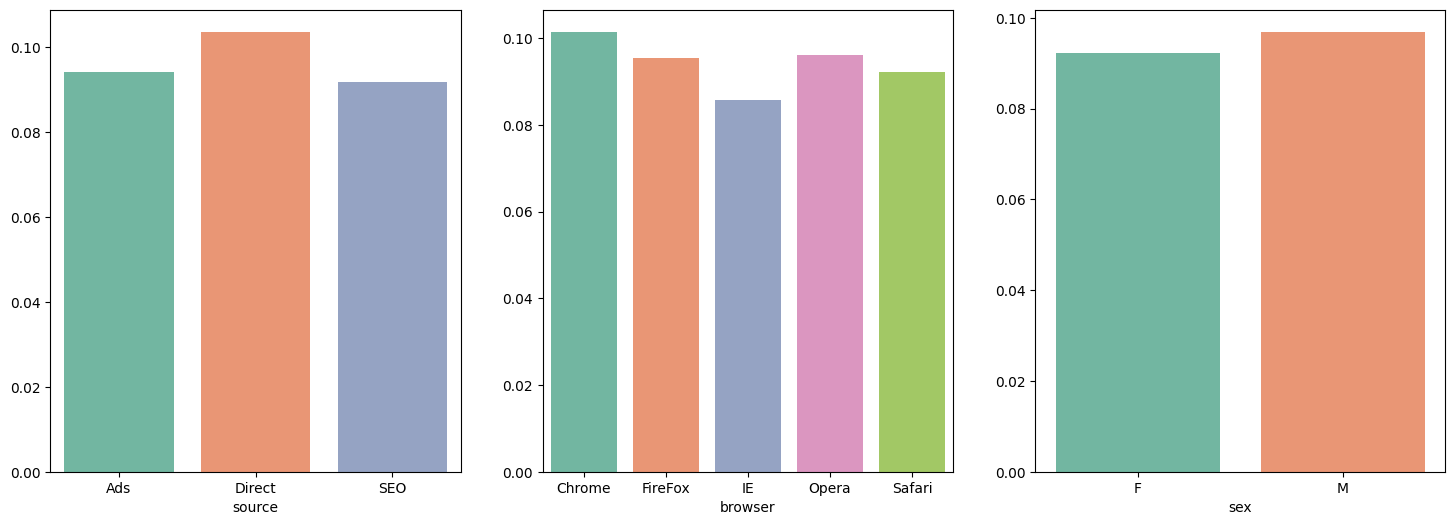

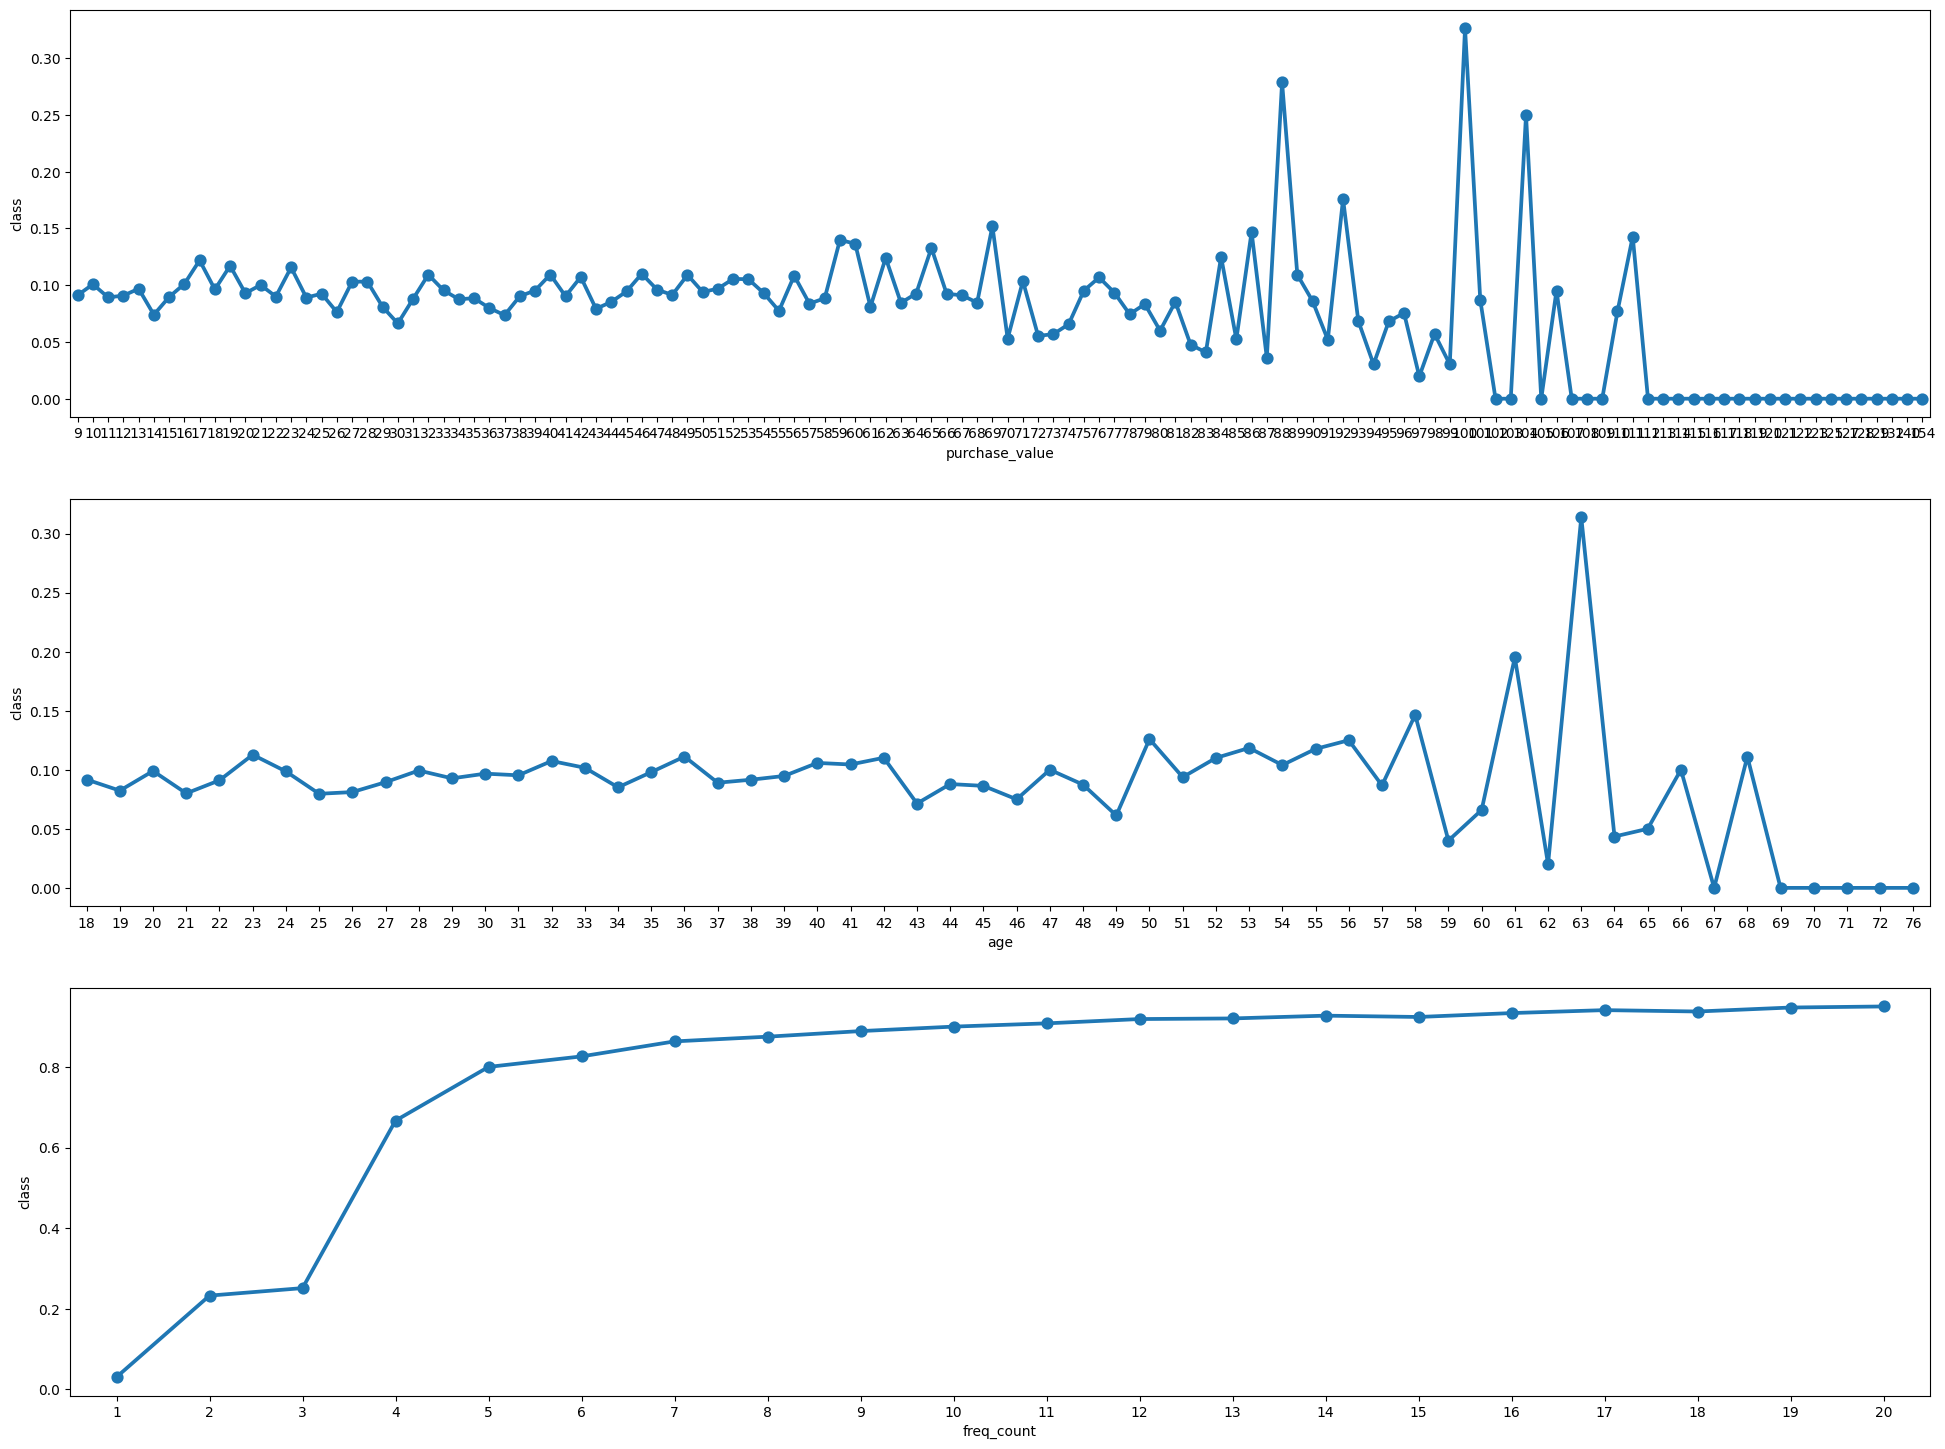

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1,3,figsize=(18,6))
f1, ax1 = plt.subplots(3,1,figsize=(24,18))

def plot_barcharts(df, col, ax_index):
  class_mean = df.groupby(col)["class"].mean()

  sns.barplot(
      x=class_mean.index,
      y=class_mean.values,
      palette="Set2",
      ax=ax[ax_index]
  )

def point_plot(df, col, ax_index):
  sns.pointplot(
      x=col,
      y="class",
      data=df,
      # logistic=True,
      ci=None,
      ax=ax1[ax_index]
  )

# Barcharts
plot_barcharts(df_fraud, 'source', 0)
plot_barcharts(df_fraud, 'browser', 1)
plot_barcharts(df_fraud, 'sex', 2)

# Pointplots
point_plot(df_fraud, 'purchase_value', 0)
point_plot(df_fraud, 'age', 1)
point_plot(df_fraud, 'freq_count', 2)

Printing class sums


C:\Users\redie\AppData\Local\Temp\ipykernel_18120\3824136539.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\redie\AppData\Local\Temp\ipykernel_18120\3824136539.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Printing class means


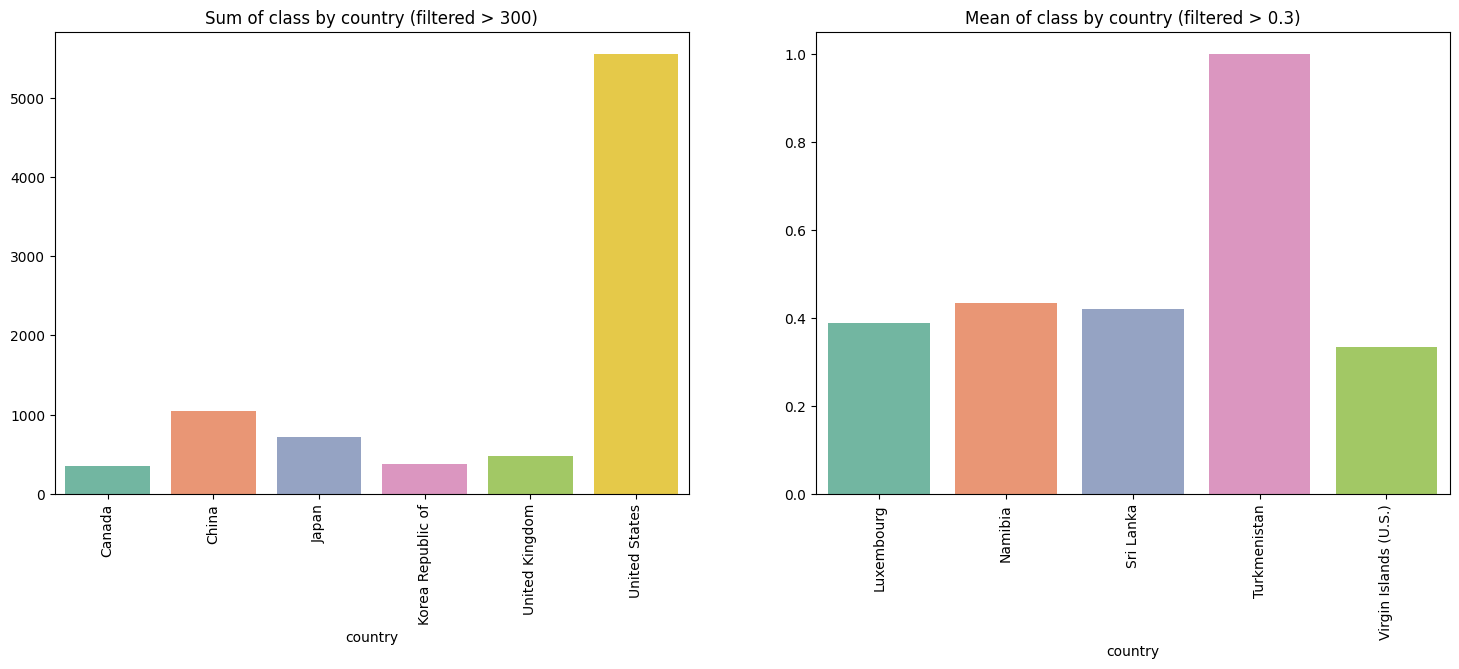

In [5]:
# Overview of Distribution by Country

f, ax = plt.subplots(1,2,figsize=(18,6))

def plot_barcharts_sum(df, col, index):
  class_sum = df.groupby(col, dropna=False)["class"].sum()
  filtered_class_sum = class_sum[class_sum > 300]
  sns.barplot(
      x=filtered_class_sum.index.astype(str),
      y=filtered_class_sum.values,
      palette="Set2",
      ax=ax[index]
  )

  ax[index].set_title(f"Sum of class by {col} (filtered > 300)")
  ax[index].tick_params(axis="x", rotation=90)

def plot_barcharts_mean(df, col, index):
  class_mean = df.groupby(col, dropna=False)["class"].mean()
  filtered_class_mean = class_mean[class_mean > 0.3]

  sns.barplot(
      x=filtered_class_mean.index.astype(str),
      y=filtered_class_mean.values,
      palette="Set2",
      ax=ax[index]
  )

  ax[index].set_title(f"Mean of class by {col} (filtered > 0.3)")
  ax[index].tick_params(axis="x", rotation=90)

print("Printing class sums")
plot_barcharts_sum(df_fraud, 'country', 0)

print("Printing class means")
plot_barcharts_mean(df_fraud, 'country', 1)


### Merging Fraud dataset and IP table

In [ ]:
# # Import IP table

# ip_address_map = '/content/drive/MyDrive/10Academy/Week8and9/IpAddress_to_Country.csv'

# df_ip = pd.read_csv(ip_address_map)

In [ ]:
# df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
# def ip_to_country_converter(row):
#   ip = row['ip_address']
#   country = df_ip[(df_ip['lower_bound_ip_address'] <=ip) & (df_ip['upper_bound_ip_address'] >= ip)]['country'].values
#   if len(country) > 0:
#     return country[0]

# df_fraud['country'] = df_fraud.apply(ip_to_country_converter, axis=1)

In [ ]:
# df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,freq_count,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,12,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,United States


In [ ]:
# df_fraud.to_csv("/content/drive/MyDrive/10Academy/Week8and9/Merged/fraud_country_merged.csv", index=False)

In [ ]:
# df_fraud = pd.read_csv("/content/drive/MyDrive/10Academy/Week8and9/Merged/fraud_country_merged.csv")

In [21]:
# Country Stats
df_fraud['country'].unique()

array(['Japan', 'United States', nan, 'Canada', 'China', 'Brazil',
       'India', 'Argentina', 'United Kingdom', 'South Africa', 'Germany',
       'Mexico', 'Sweden', 'Korea Republic of', 'Peru', 'Portugal',
       'Bangladesh', 'France', 'Taiwan; Republic of China (ROC)',
       'Russian Federation', 'Belgium', 'Denmark', 'Netherlands',
       'Iran (ISLAMIC Republic Of)', 'Spain', 'Gabon', 'Saudi Arabia',
       'Hong Kong', 'Georgia', 'Syrian Arab Republic', 'Turkey',
       'New Zealand', 'European Union', 'Australia', 'Ukraine', 'Austria',
       'Israel', 'Malaysia', 'Greece', 'Italy', 'Norway', 'Poland',
       'Venezuela', 'Thailand', 'Chile', 'Morocco', 'Finland', 'Hungary',
       'Indonesia', 'Colombia', 'Ecuador', 'Lithuania', 'Switzerland',
       'Viet Nam', 'Nigeria', 'Egypt', 'Seychelles', 'Kazakhstan',
       'Kenya', 'Moldova Republic of', 'Trinidad and Tobago', 'Qatar',
       'Bolivia', 'Bulgaria', 'Romania', 'Croatia (LOCAL Name: Hrvatska)',
       'Cyprus', 'Czec

In [22]:
# Count the number of None Countries
df_fraud['country'].isnull().sum()

np.int64(21966)

In [23]:
# Count the number of None Counties and Class 1
df_fraud[(df_fraud['country'].isnull()) & (df_fraud['class'] == 1)].shape[0]

1883

Printing class sums
Printing class means


/tmp/ipython-input-3824136539.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3824136539.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


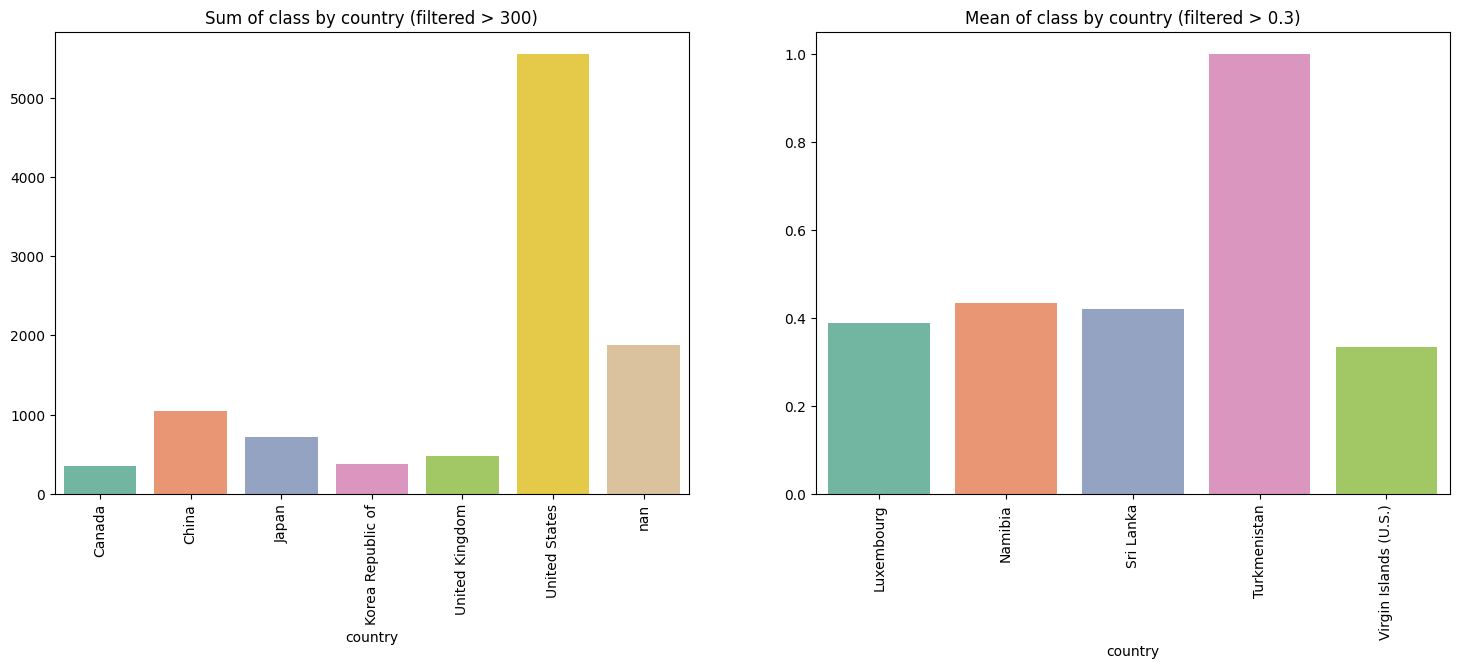

In [24]:
# Overview of Distribution by Country

f, ax = plt.subplots(1,2,figsize=(18,6))

def plot_barcharts_sum(df, col, index):
  class_sum = df.groupby(col, dropna=False)["class"].sum()
  filtered_class_sum = class_sum[class_sum > 300]
  sns.barplot(
      x=filtered_class_sum.index.astype(str),
      y=filtered_class_sum.values,
      palette="Set2",
      ax=ax[index]
  )

  ax[index].set_title(f"Sum of class by {col} (filtered > 300)")
  ax[index].tick_params(axis="x", rotation=90)

def plot_barcharts_mean(df, col, index):
  class_mean = df.groupby(col, dropna=False)["class"].mean()
  filtered_class_mean = class_mean[class_mean > 0.3]

  sns.barplot(
      x=filtered_class_mean.index.astype(str),
      y=filtered_class_mean.values,
      palette="Set2",
      ax=ax[index]
  )

  ax[index].set_title(f"Mean of class by {col} (filtered > 0.3)")
  ax[index].tick_params(axis="x", rotation=90)

print("Printing class sums")
plot_barcharts_sum(df_fraud, 'country', 0)

print("Printing class means")
plot_barcharts_mean(df_fraud, 'country', 1)


In [25]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,freq_count,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,12,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,United States


### Feature Engineering

In [ ]:
# # --- 1 ---
# # Categorisation column freq_device
# # We see a clear correlation between freq_device and fraudulent activities. We are going to split freq_device in 7 categories
# df_fraud.freq_count = df_fraud.freq_count.apply(lambda x :
#                                                 str(x) if x <5 else
#                                                 "5-10" if x>=5 and x<=10 else
#                                                 "11-15" if x>10 and x<=15 else
#                                                 "> 15")


In [ ]:
# df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,freq_count,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,11-15,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,United States


In [29]:
df_fraud['freq_count'].unique()

array(['1', '11-15', '5-10', '2', '> 15', '4', '3'], dtype=object)

In [ ]:
# # Convert signup and purchase time to datetime
# def convert_to_datetime(df):
#     # Convert 'at' column to datetime object
#     df['purchase_time_dt'] = pd.to_datetime(df['purchase_time'], errors='coerce')
#     df['signup_time_dt'] = pd.to_datetime(df['signup_time'], errors='coerce')


# convert_to_datetime(df_fraud)


In [ ]:
# # Extract month, week, hour of the day
# import calendar

# def extract_time_features(df):
#     # Extract month
#     df['purchase_month'] = df.purchase_time_dt.apply(lambda x: calendar.month_name[x.month])
#     df['purchase_week'] = df.purchase_time_dt.apply(lambda x: calendar.day_name[x.weekday()])
#     df['purchase_hour'] = df.purchase_time_dt.apply(lambda x: x.hour)
#     df['seconds_since_signup'] = (df.purchase_time_dt - df.signup_time_dt).apply(lambda x: x.total_seconds())

# extract_time_features(df_fraud)

In [38]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,freq_count,country,purchase_time_dt,signup_time_dt,purchase_month,purchase_week,purchase_hour,seconds_since_signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,Japan,2015-04-18 02:47:11,2015-02-24 22:55:49,April,Saturday,2,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,United States,2015-06-08 01:38:54,2015-06-07 20:39:50,June,Monday,1,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,11-15,United States,2015-01-01 18:52:45,2015-01-01 18:52:44,January,Thursday,18,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1,NaN,2015-05-04 13:54:50,2015-04-28 21:13:25,May,Monday,13,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,United States,2015-09-09 18:40:53,2015-07-21 07:09:52,September,Wednesday,18,4361461.0


In [46]:
# In order to calculate transaction frequency and velocity, a customer must have made
# purchases

# Checking if user has multiple purchases

grouped_by_user_id = df_fraud.groupby(by="user_id").user_id.count()

print(f"Selection is a dataframe {isinstance(grouped_by_user_id, pd.DataFrame)}")
print(f"Selection is a series {isinstance(grouped_by_user_id, pd.Series)}")

grouped_by_user_id[grouped_by_user_id > 1]


Selection is a dataframe False
Selection is a series True


,user_id
user_id,


From the above we can observe that the a single user did not multiple transactions. Hence calculation of transaction frequency and density is not required.

In [ ]:
# # Getting country risk
# country_risk_df = pd.DataFrame(df_fraud.groupby(by='country')['class'].mean().sort_values(ascending=False))
# country_risk_df = country_risk_df.reset_index().rename(columns={'class': 'country_risk_values'})

In [ ]:
# country_risk_df.head()

,country,country_risk_values
0,Turkmenistan,1.000000
1,Namibia,0.434783
2,Sri Lanka,0.419355
3,Luxembourg,0.388889
4,Virgin Islands (U.S.),0.333333


In [ ]:
# # Merge df_fraud and country_risk_df
# df_fraud = df_fraud.merge(country_risk_df, on='country')

In [ ]:
# df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,freq_count,country,purchase_time_dt,signup_time_dt,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,Japan,2015-04-18 02:47:11,2015-02-24 22:55:49,April,Saturday,2,4506682.0,0.097865
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,United States,2015-06-08 01:38:54,2015-06-07 20:39:50,June,Monday,1,17944.0,0.095626
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,11-15,United States,2015-01-01 18:52:45,2015-01-01 18:52:44,January,Thursday,18,1.0,0.095626
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,United States,2015-09-09 18:40:53,2015-07-21 07:09:52,September,Wednesday,18,4361461.0,0.095626
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,1,Canada,2015-07-09 08:05:14,2015-05-21 06:03:03,July,Thursday,8,4240931.0,0.116975


#### Generating country risk bins

In [ ]:
# # Calculate country risk bins
# country_risk_df['country_risk_bins'] = country_risk_df['country_risk_values'].apply(lambda x:
#                                                             "Very high risk" if x > 0.25 else
#                                                             "High risk" if x > 0.05 else
#                                                             "Medium risk" if x > 0.01 else
#                                                             "Low risk")



In [ ]:
# df_fraud = df_fraud.merge(country_risk_df, on="country")

In [ ]:
# df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,country,purchase_time_dt,signup_time_dt,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values_x,country_risk_values_y,country_risk_bins
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,Japan,2015-04-18 02:47:11,2015-02-24 22:55:49,April,Saturday,2,4506682.0,0.097865,0.097865,High risk
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,United States,2015-06-08 01:38:54,2015-06-07 20:39:50,June,Monday,1,17944.0,0.095626,0.095626,High risk
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,United States,2015-01-01 18:52:45,2015-01-01 18:52:44,January,Thursday,18,1.0,0.095626,0.095626,High risk
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,United States,2015-09-09 18:40:53,2015-07-21 07:09:52,September,Wednesday,18,4361461.0,0.095626,0.095626,High risk
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,...,Canada,2015-07-09 08:05:14,2015-05-21 06:03:03,July,Thursday,8,4240931.0,0.116975,0.116975,High risk


#### Generating age risk bins

In [ ]:
# df_fraud["age_bins"] =  df_fraud["age"].apply(lambda x:
#                                               "< 40" if x < 40 else
#                                               "40 - 49" if x<50 else
#                                               "50 - 59" if x<60 else
#                                               "60 - 69" if x < 70 else
#                                               "> 70")

In [ ]:
# df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,purchase_time_dt,signup_time_dt,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values_x,country_risk_values_y,country_risk_bins,age_bins
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,2015-04-18 02:47:11,2015-02-24 22:55:49,April,Saturday,2,4506682.0,0.097865,0.097865,High risk,< 40
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,2015-06-08 01:38:54,2015-06-07 20:39:50,June,Monday,1,17944.0,0.095626,0.095626,High risk,50 - 59
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,2015-01-01 18:52:45,2015-01-01 18:52:44,January,Thursday,18,1.0,0.095626,0.095626,High risk,50 - 59
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,2015-09-09 18:40:53,2015-07-21 07:09:52,September,Wednesday,18,4361461.0,0.095626,0.095626,High risk,40 - 49
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,...,2015-07-09 08:05:14,2015-05-21 06:03:03,July,Thursday,8,4240931.0,0.116975,0.116975,High risk,< 40


In [ ]:
# df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,freq_count,country,purchase_time_dt,signup_time_dt,purchase_month,purchase_week,purchase_hour,seconds_since_signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,Japan,2015-04-18 02:47:11,2015-02-24 22:55:49,April,Saturday,2,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,United States,2015-06-08 01:38:54,2015-06-07 20:39:50,June,Monday,1,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,11-15,United States,2015-01-01 18:52:45,2015-01-01 18:52:44,January,Thursday,18,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1,NaN,2015-05-04 13:54:50,2015-04-28 21:13:25,May,Monday,13,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,United States,2015-09-09 18:40:53,2015-07-21 07:09:52,September,Wednesday,18,4361461.0


In [87]:
df_fraud_train = df_fraud.copy()

In [88]:
df_fraud_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,purchase_time_dt,signup_time_dt,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values_x,country_risk_values_y,country_risk_bins,age_bins
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,2015-04-18 02:47:11,2015-02-24 22:55:49,April,Saturday,2,4506682.0,0.097865,0.097865,High risk,< 40
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,2015-06-08 01:38:54,2015-06-07 20:39:50,June,Monday,1,17944.0,0.095626,0.095626,High risk,50 - 59
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,2015-01-01 18:52:45,2015-01-01 18:52:44,January,Thursday,18,1.0,0.095626,0.095626,High risk,50 - 59
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,2015-09-09 18:40:53,2015-07-21 07:09:52,September,Wednesday,18,4361461.0,0.095626,0.095626,High risk,40 - 49
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,...,2015-07-09 08:05:14,2015-05-21 06:03:03,July,Thursday,8,4240931.0,0.116975,0.116975,High risk,< 40


In [ ]:
# Dropping unnecessary columns
df_fraud_train.drop([
    "user_id",
    "signup_time",
    "purchase_time",
    "purchase_time_dt",
    "signup_time_dt",
    "device_id",
    "age",
    "ip_address",
    "country_risk_values_x",
    "country_risk_values_y",
    "freq_count"
    ], axis=1, inplace=True)

In [90]:
df_fraud_train.head()

,purchase_value,source,browser,sex,class,freq_count,country,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_bins,age_bins
0,34,SEO,Chrome,M,0,1,Japan,April,Saturday,2,4506682.0,High risk,< 40
1,16,Ads,Chrome,F,0,1,United States,June,Monday,1,17944.0,High risk,50 - 59
2,15,SEO,Opera,M,1,11-15,United States,January,Thursday,18,1.0,High risk,50 - 59
3,39,Ads,Safari,M,0,1,United States,September,Wednesday,18,4361461.0,High risk,40 - 49
4,42,Ads,Chrome,M,0,1,Canada,July,Thursday,8,4240931.0,High risk,< 40


#### Training a model

In [91]:
X = pd.get_dummies(df_fraud_train.drop("class", axis=1), drop_first=True)
y = df_fraud_train["class"]

In [92]:
X.head()

,purchase_value,purchase_hour,seconds_since_signup,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,...,purchase_week_Thursday,purchase_week_Tuesday,purchase_week_Wednesday,country_risk_bins_Low risk,country_risk_bins_Medium risk,country_risk_bins_Very high risk,age_bins_50 - 59,age_bins_60 - 69,age_bins_< 40,age_bins_> 70
0,34,2,4506682.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,16,1,17944.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,15,18,1.0,False,True,False,False,True,False,True,...,True,False,False,False,False,False,True,False,False,False
3,39,18,4361461.0,False,False,False,False,False,True,True,...,False,False,True,False,False,False,False,False,False,False
4,42,8,4240931.0,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [94]:
# Normalizing X_train and X_test

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

##### Traning a Logistic Regraesion model

In [97]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print(" Train Accuracy : ", int(log_reg.score(X_train, y_train)*1000)/10, "%")

print(" Test Accuracy : " , int(log_reg.score(X_test, y_test)*1000)/10, "%")


 Train Accuracy :  95.1 %
 Test Accuracy :  95.2 %


Text(20.72222222222222, 0.5, 'True')

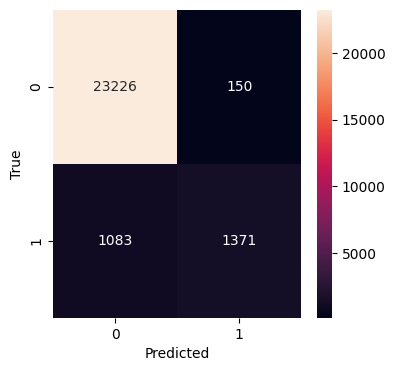

In [100]:
# Confusion Matrix

f, ax = plt.subplots(1,1, figsize =(4,4))

# Matrix with threshold by default (50%)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_reg.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('True')


##### Training a Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [104]:
# Evalute the performance of the model

train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print(f"Training accuracy: {train_acc:.2%}")
print(f"Testing accuracy: {test_acc:.2%}")

Training accuracy: 100.00%
Testing accuracy: 95.74%


Text(20.72222222222222, 0.5, 'True')

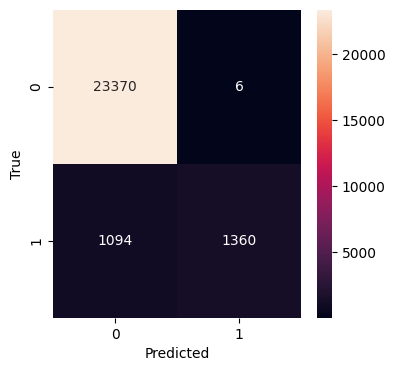

In [105]:
# Confusion Matrix

f, ax = plt.subplots(1,1, figsize =(4,4))

# Matrix with threshold by default (50%)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('True')


Visualizing class sum distribution by country

In [77]:
df_country = pd.DataFrame(df_fraud.groupby(by="country")["class"].sum().reset_index().rename(columns={"class":"class_sum"}))

In [78]:
df_country.head()

,country,class_sum
0,Afghanistan,1
1,Albania,0
2,Algeria,13
3,Angola,1
4,Antigua and Barbuda,0


In [80]:
df_country.sort_values(by="class_sum", ascending=False)

,country,class_sum
171,United States,5551
36,China,1043
84,Japan,715
170,United Kingdom,477
88,Korea Republic of,380
...,...,...
167,Uganda,0
174,Vanuatu,0
178,Yemen,0
179,Zambia,0


In [81]:
df_country[df_country['country'] == 'Turkmenistan']

,country,class_sum
166,Turkmenistan,1


In [82]:
df_fraud[df_fraud['country'] == 'Turkmenistan']

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,freq_count,country
2420,138998,2015-02-27 14:39:08,2015-03-31 12:12:40,37,RSEQYZOIJLVPL,SEO,FireFox,F,29,1.583788e+09,1,2,Turkmenistan


In [85]:
# Counting all classes
count = df_fraud[df_fraud['country'] == 'United States'].shape[0]
print(count)

58049


In [86]:
# Counting all classes with class 1
count = df_fraud[(df_fraud['country'] == 'United States') & (df_fraud['class'] == 1)].shape[0]
print(count)

5551


Visualizing class mean distribution by country

In [67]:
df_country = pd.DataFrame(df_fraud.groupby(by="country")["class"].mean().reset_index().rename(columns={"class":"class_mean"}))

In [69]:
df_country.sort_values(by="class_mean", ascending=False)

,country,class_mean
166,Turkmenistan,1.000000
115,Namibia,0.434783
154,Sri Lanka,0.419355
98,Luxembourg,0.388889
177,Virgin Islands (U.S.),0.333333
...,...,...
167,Uganda,0.000000
174,Vanuatu,0.000000
178,Yemen,0.000000
179,Zambia,0.000000


In [70]:
df_country.columns

Index(['country', 'class_mean'], dtype='object')

In [72]:
df_country[df_country['country'] == 'Turkmenistan']

,country,class_mean
166,Turkmenistan,1.0


In [ ]:
# Load Cleaned Dataset
import pandas as pd
fraud_cleaned_dataset_path = "/content/drive/MyDrive/10Academy/Week8and9/Cleaned/fraud_cleaned_preprocess_complete.csv"

df_fraud_cleaned = pd.read_csv(fraud_cleaned_dataset_path)

In [ ]:
df_fraud_cleaned.head()

,user_id,purchase_value,device_id,age,ip_address,class,purchase_time_dt,signup_time_dt,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,22058,34,QVPSPJUOCKZAR,39,7.327584e+08,0,2015-04-18 02:47:11,2015-02-24 22:55:49,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,333320,16,EOGFQPIZPYXFZ,53,3.503114e+08,0,2015-06-08 01:38:54,2015-06-07 20:39:50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1359,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,2015-01-01 18:52:45,2015-01-01 18:52:44,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,150084,44,ATGTXKYKUDUQN,41,3.840542e+09,0,2015-05-04 13:54:50,2015-04-28 21:13:25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,221365,39,NAUITBZFJKHWW,45,4.155831e+08,0,2015-09-09 18:40:53,2015-07-21 07:09:52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Summary

In [ ]:
display(df_fraud_cleaned.select_dtypes(include='number').describe())

,user_id,purchase_value,age,ip_address,class,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646,0.396269,0.202605,0.401126,0.406533,0.162859,0.243045,0.024326,0.163237,0.415712,0.584288
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336,0.489123,0.401942,0.490128,0.491188,0.369239,0.428923,0.154061,0.369583,0.492846,0.492846
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Skewness Check[link text](https://)

In [ ]:
def skewness(df):
    '''
    Display The skew value of each column.
    skewness b/n -0.5 - 0.5 : good
    skewness b/n -1 - -0.5  : negative skew
    skewness b/n 0.5 - 1    : positive skew
    other values: are highly skewed
    '''
    print("Checking skewness of dataset")
    display(df.select_dtypes(include='number').skew())
skewness(df_fraud_cleaned)

Checking skewness of dataset


,0
user_id,0.000161
purchase_value,0.670485
age,0.425481
ip_address,-0.007053
class,2.789626
source_Ads,0.424156
source_Direct,1.479813
source_SEO,0.403466
browser_Chrome,0.380581
browser_FireFox,1.826164


In [ ]:
def plot_density(df, col):
    df_fraud_cleaned[col].plot.density(bw_method='scott', color='blue', linestyle='-', linewidth=2)
    plt.show()

for index, col in df_fraud_cleaned.columns.enumerate():
  print(f"Density plot for {col}")
  plot_density(df_fraud_cleaned, index)
  # df_fraud_cleaned[col].plot.density(bw_method='scott', color='blue', linestyle='-', linewidth=2)
  # plt.show()

Density plot for user_id


AttributeError: 'str' object has no attribute 'plot'

### Box Plot

In [ ]:
numerical_columns = df_fraud_cleaned.select_dtypes(include='number')
num_col_names = numerical_columns.columns.tolist()

In [ ]:
print(num_col_names)

['user_id', 'purchase_value', 'age', 'ip_address', 'class', 'source_Ads', 'source_Direct', 'source_SEO', 'browser_Chrome', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'sex_F', 'sex_M']


Box plot for user_id


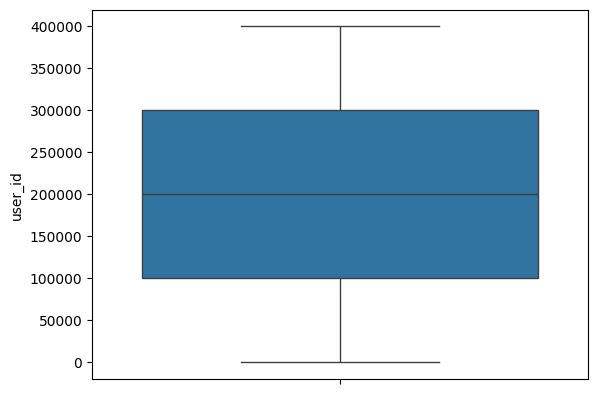

Box plot for purchase_value


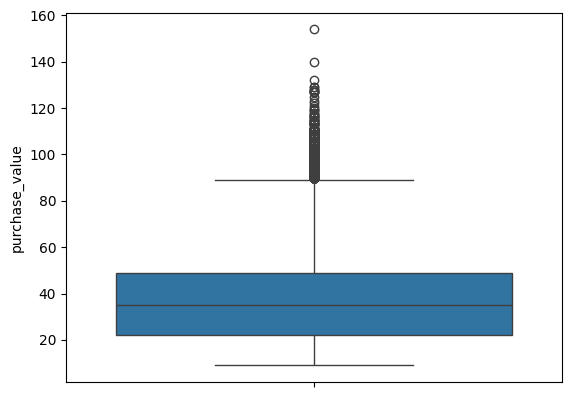

Box plot for age


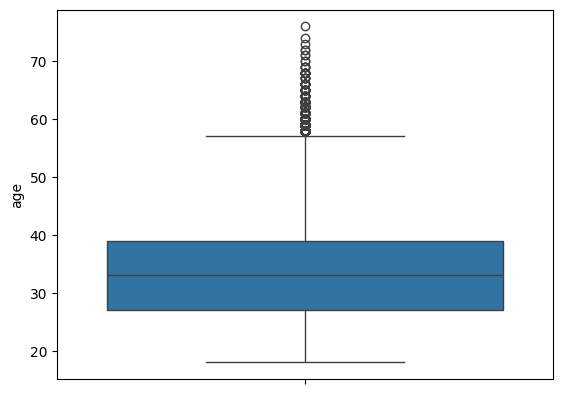

Box plot for ip_address


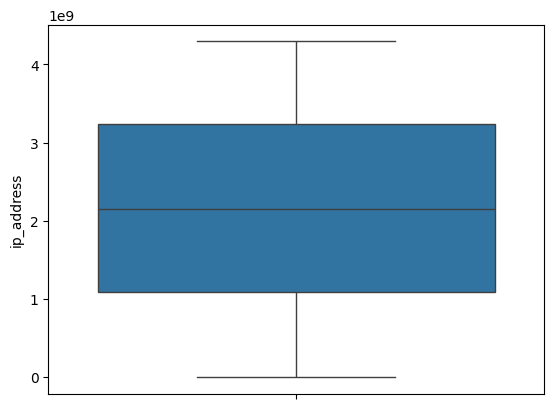

Box plot for class


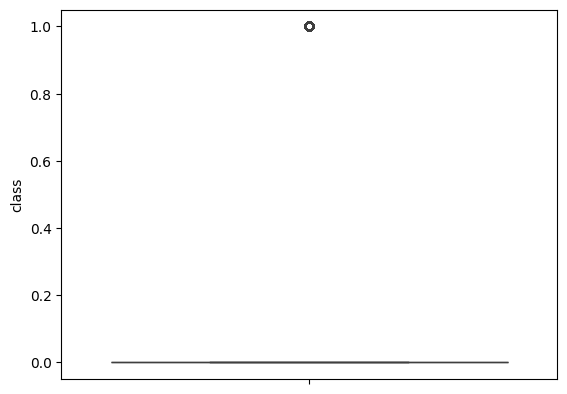

Box plot for source_Ads


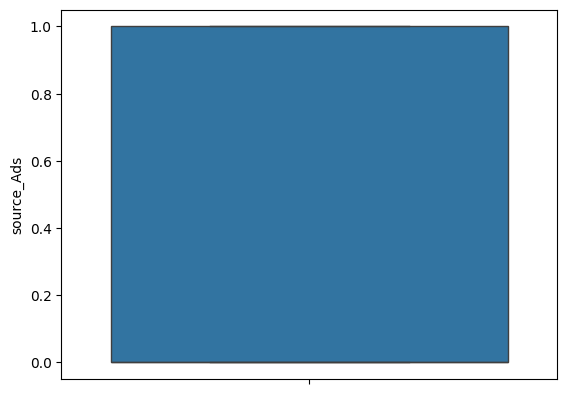

Box plot for source_Direct


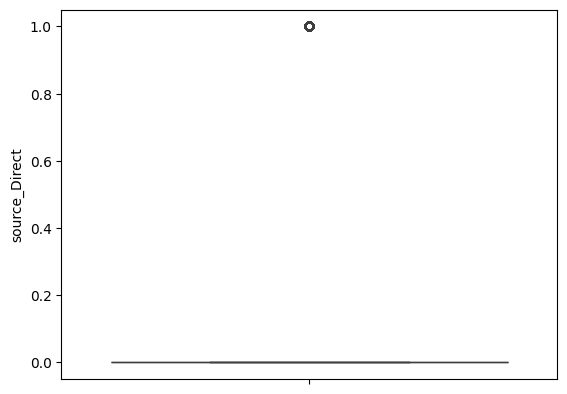

Box plot for source_SEO


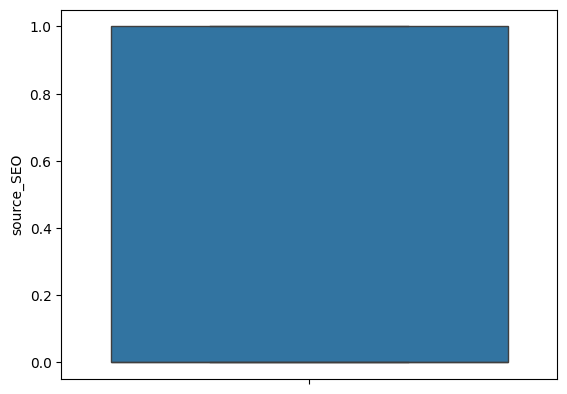

Box plot for browser_Chrome


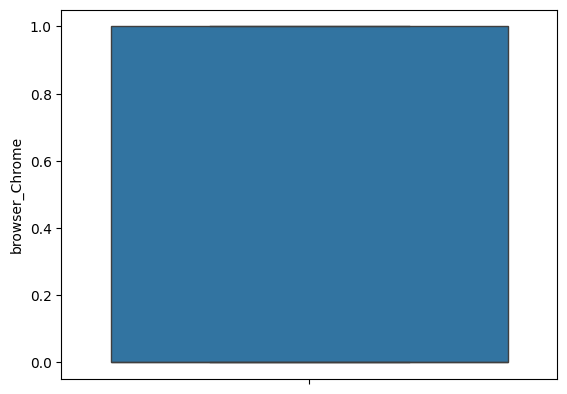

Box plot for browser_FireFox


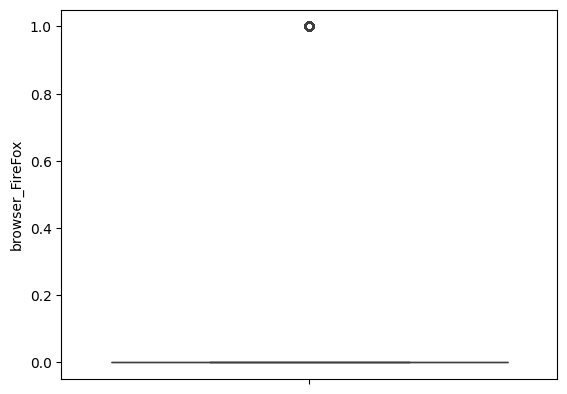

Box plot for browser_IE


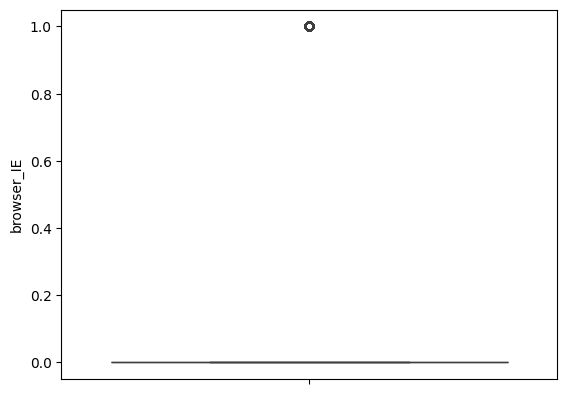

Box plot for browser_Opera


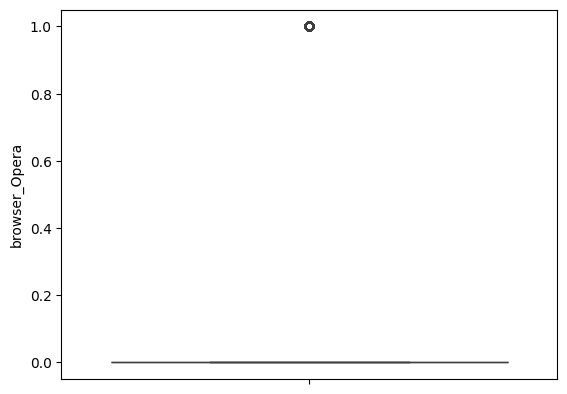

Box plot for browser_Safari


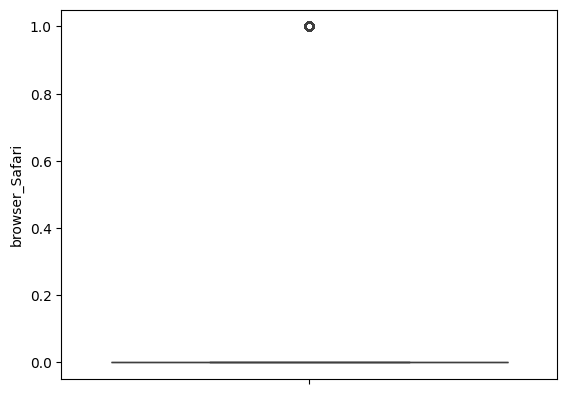

Box plot for sex_F


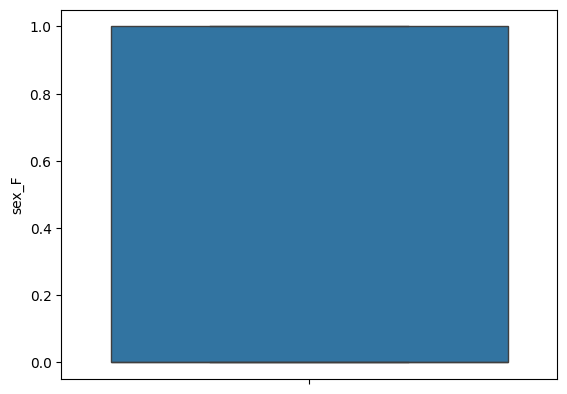

Box plot for sex_M


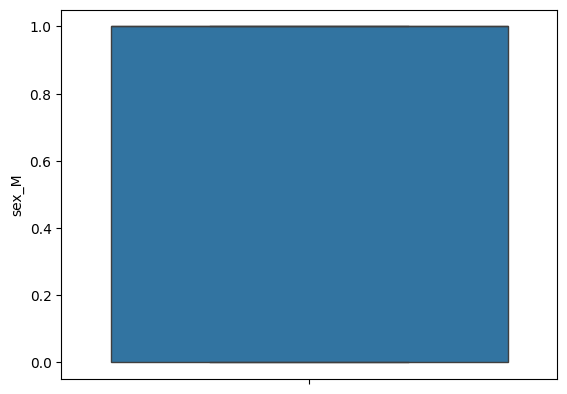

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_box_plot(col):
  print(f"Box plot for {col}")
  sns.boxplot(y=df_fraud_cleaned[col])
  plt.show()

for col in num_col_names:
  plot_box_plot(col)

It is observed that age and purchase value have outliers

In [ ]:
# Checking if the same device_id is sometimes used several times

dup_table = pd.DataFrame(df_fraud_cleaned.duplicated(subset = "device_id"))
dup_rate = dup_table.mean()
print("{}% of the dataset is comprised of transactions from a device_id that had been previously used".format(int(dup_rate*1000)/10))

8.7% of the dataset is comprised of transactions from a device_id that had been previously used


/tmp/ipython-input-3621739478.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("{}% of the dataset is comprised of transactions from a device_id that had been previously used".format(int(dup_rate*1000)/10))


In [ ]:
print("proportion of fraud in the dataset :" , int(df_fraud_cleaned["class"].mean()*1000)/10,"%")

proportion of fraud in the dataset : 9.3 %
